# Author : Jitesh Jain 

# GRIP @ The Sparks Foundation

## Task 5 : Exploratory Data Analysis : Sports (Indian Premier League)

## (Level - Advanced)

### Problem Statement:
 - Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'.
 - As a Sports Analyst, try to find out the most successful teams, players and factors contributing win or loss of a team.
 - Suggest teams or players a company should endorse for its products.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load datasets

In [2]:
data_m = pd.read_csv('C:/Users/jites/Downloads/Indian Premier League/matches.csv', index_col=0)
data_d = pd.read_csv('C:/Users/jites/Downloads/Indian Premier League/deliveries.csv', index_col=0)

In [3]:
data_m.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data_d.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

In [6]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            179078 non-null  int64 
 1   batting_team      179078 non-null  object
 2   bowling_team      179078 non-null  object
 3   over              179078 non-null  int64 
 4   ball              179078 non-null  int64 
 5   batsman           179078 non-null  object
 6   non_striker       179078 non-null  object
 7   bowler            179078 non-null  object
 8   is_super_over     179078 non-null  int64 
 9   wide_runs         179078 non-null  int64 
 10  bye_runs          179078 non-null  int64 
 11  legbye_runs       179078 non-null  int64 
 12  noball_runs       179078 non-null  int64 
 13  penalty_runs      179078 non-null  int64 
 14  batsman_runs      179078 non-null  int64 
 15  extra_runs        179078 non-null  int64 
 16  total_runs        179078 non-null  int6

### Fetch unique values from the dataset

In [7]:
data_m['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
data_m['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
print('Number of seasons: ', data_m['season'].nunique())
print('Seasons: ', data_m['season'].unique())
print('Number of matches played: ', data_m.index.nunique())

Number of seasons:  12
Seasons:  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Number of matches played:  756


# Data Cleaning

### Replacing the team names with their abbreviations

In [10]:
data_m.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
data_m.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

data_d.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
data_d.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

### Checking for null values

#### For matches dataset:

In [11]:
data_m.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

We can see that the 'umpire3' column has most null values, so we can drop it and replace the remaining null values with zeros in the dataset.

In [12]:
data_m.drop(columns=['umpire3'], axis=1, inplace=True)
data_m.fillna(0, inplace=True)
data_m.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0


#### For deliveries dataset:

In [13]:
data_d.isnull().sum()

inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [14]:
data_d.fillna(0, inplace=True)
data_d.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


 - So we are done with cleaning our data and can now perform Data Visualization.

## Data Visualization

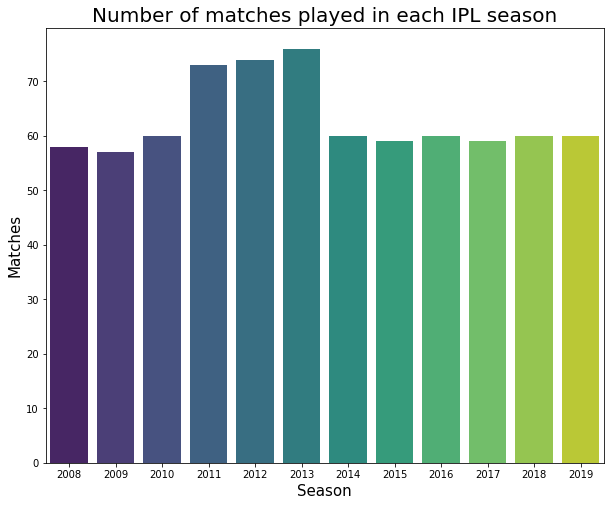

In [15]:
plt.figure(figsize=(10,8))
sns.countplot('season', data=data_m, palette='viridis')
plt.title('Number of matches played in each IPL season', fontsize = 20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Matches', fontsize=15)
plt.show()

 - Highest number of matches were played in 2013.

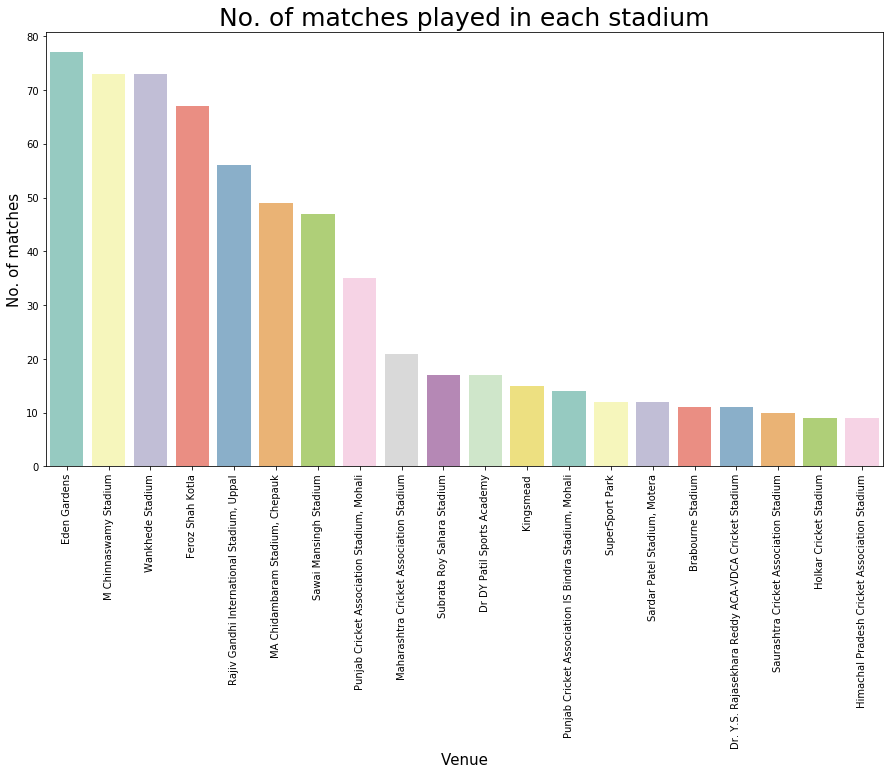

In [16]:
ground = data_m['venue'].value_counts().reset_index().head(20)
ground.columns = ['venue', 'count']
ground
plt.figure(figsize=(15,8))
sns.barplot(x=ground['venue'], y=ground['count'], palette='Set3')
plt.title('No. of matches played in each stadium', fontsize=25)
plt.xlabel('Venue', fontsize=15)
plt.ylabel('No. of matches', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Most number of matches have been played at the Eden Gardens, Kolkata.

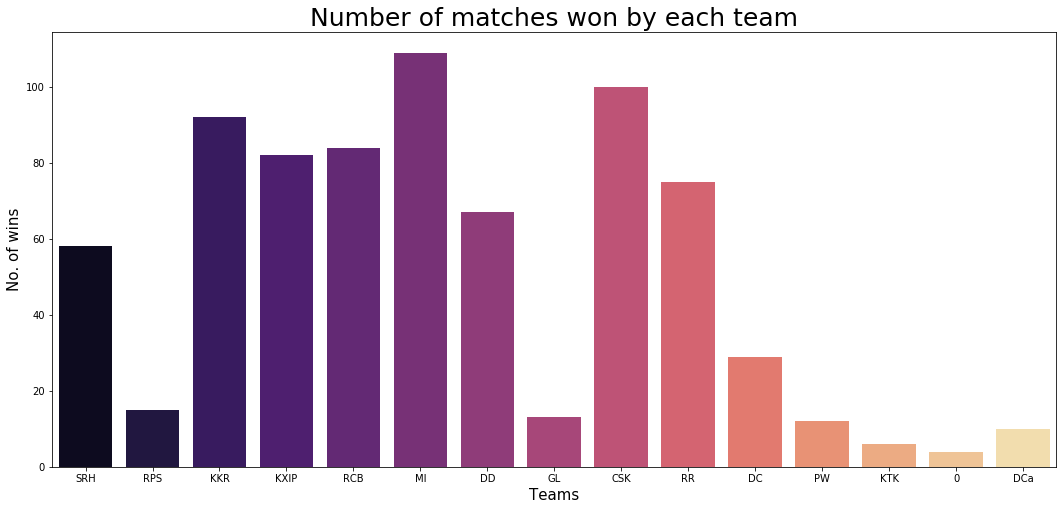

In [17]:
plt.figure(figsize=(18,8))
sns.countplot('winner', data=data_m, palette='magma')
plt.title('Number of matches won by each team', fontsize=25)
plt.xlabel('Teams', fontsize=15)
plt.ylabel('No. of wins', fontsize=15)
plt.show()

 - Mumbai Indians have highest no. of wins while Rising Pune Supergiants has least wins.

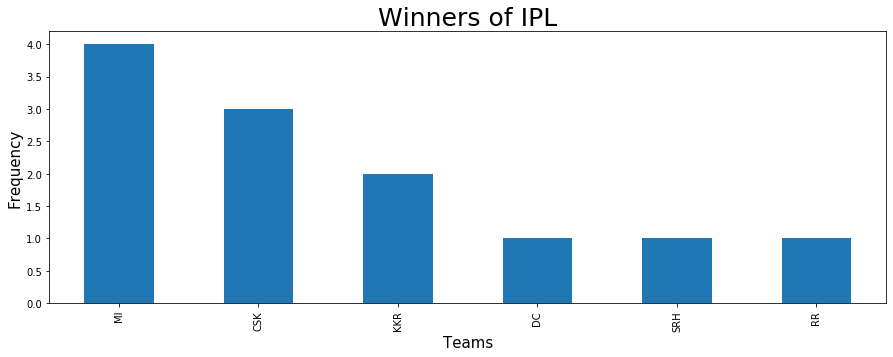

In [18]:
# Creating a dataframe with season and winner columns
winning_teams = data_m[['season', 'winner']]

# dictionaries to get winners of each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

# Plotting
plt.figure(figsize=(15,5))
winners_of_IPL['team'].value_counts().plot(kind='bar')
plt.title('Winners of IPL', fontsize=25)
plt.xlabel('Teams', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

 - Mumbai Indians has maximum number of titles (4) followed by Chennai Super Kings (3).

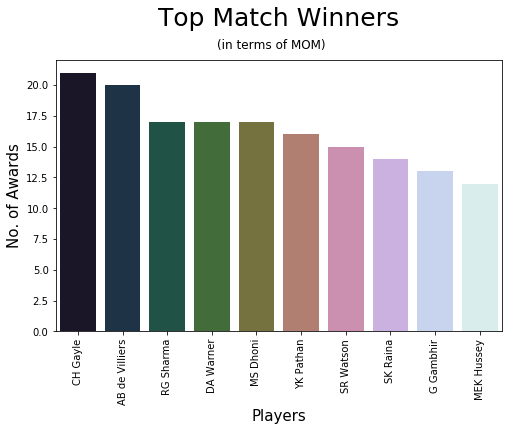

In [19]:
most_mom = data_m['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of MOM Awards']
plt.figure(figsize=(8,5))
sns.barplot(x=most_mom['Player'], y=most_mom['No. of MOM Awards'], palette='cubehelix')
plt.title('Top Match Winners\n', fontsize=25)
plt.suptitle('\n(in terms of MOM)')
plt.xlabel('Players', fontsize=15)
plt.ylabel('No. of Awards', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Chris Gayle and AB de Villiers are the Most Valuable Players of IPL with most number of man of the match awards.

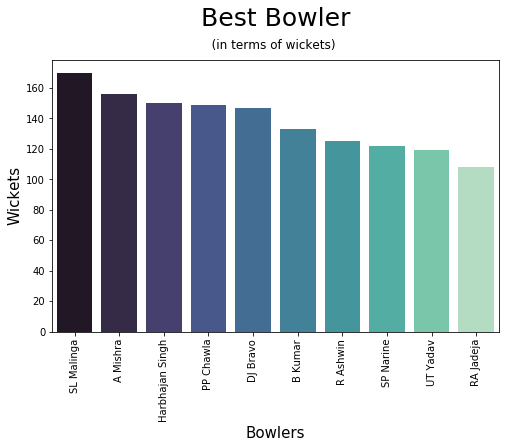

In [20]:
dismissal = ['caught', 'bowled', 'caught and bowled', 'hit wicket', 'lbw', 'stumped']
best_bowler = data_d.loc[data_d['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'], palette='mako')
plt.title('Best Bowler\n', fontsize=25)
plt.suptitle('\n   (in terms of wickets)')
plt.xlabel('Bowlers', fontsize=15)
plt.ylabel('Wickets', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Lasith Malinga is the highest wicket-taker of IPL while Amit Mishra is the best Indian bowler with most number of wickets.
 - 3 out of the top 4 wicket takers are spinners.

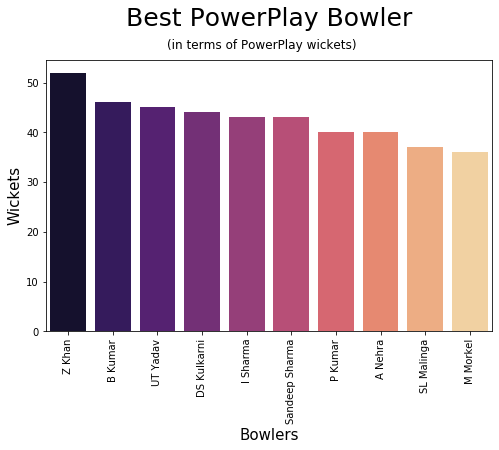

In [21]:
powerplay = [1,2,3,4,5,6]
best_bowler_pp = data_d.loc[data_d['dismissal_kind'].isin(dismissal) & data_d['over'].isin(powerplay)]
best_bowler_pp = best_bowler_pp['bowler'].value_counts().reset_index().head(10)
best_bowler_pp.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_pp['bowler'], y=best_bowler_pp['wickets'], palette='magma')
plt.title('Best PowerPlay Bowler\n', fontsize=25)
plt.suptitle('\n(in terms of PowerPlay wickets)')
plt.xlabel('Bowlers', fontsize=15)
plt.ylabel('Wickets', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Zaheer Khan has the most number of wickets in the power play followed by Bhuvneshwar Kumar.

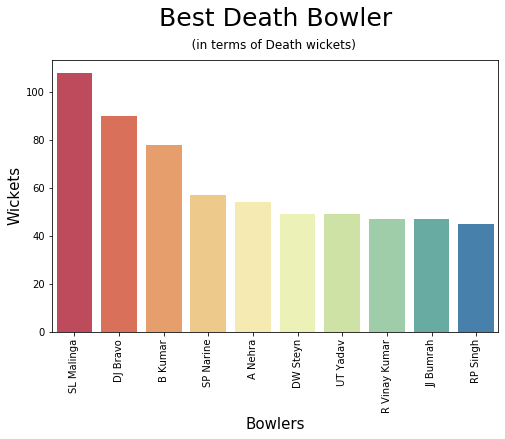

In [22]:
death = [16,17,18,19,20]
best_bowler_death = data_d.loc[data_d['dismissal_kind'].isin(dismissal) & data_d['over'].isin(death)]
best_bowler_death = best_bowler_death['bowler'].value_counts().reset_index().head(10)
best_bowler_death.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_death['bowler'], y=best_bowler_death['wickets'], palette='Spectral')
plt.title('Best Death Bowler\n', fontsize=25)
plt.suptitle('\n   (in terms of Death wickets)')
plt.xlabel('Bowlers', fontsize=15)
plt.ylabel('Wickets', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Malinga again tops the list with most number of wickets in the death overs.

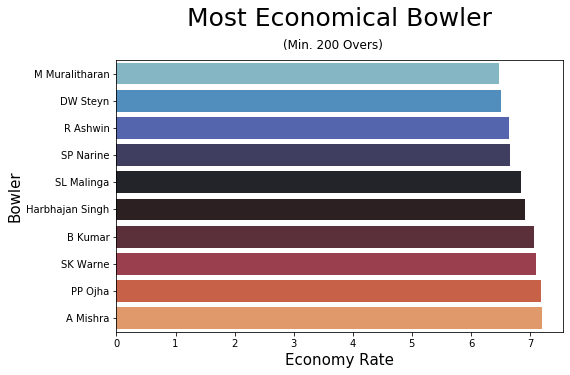

In [23]:
economy_rate = data_d.groupby(['bowler']).sum()
economy_rate['over'] = data_d['bowler'].value_counts()/6
economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] + economy_rate['batsman_runs']
economy_rate = economy_rate[economy_rate['over'] >= 200] 
economy_rate['rate'] =economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=economy_rate['rate'], y=economy_rate.index, palette='icefire')
plt.title('Most Economical Bowler\n', fontsize=25)
plt.suptitle('\n(Min. 200 Overs)')
plt.xlabel('Economy Rate', fontsize=15)
plt.ylabel('Bowler', fontsize=15)
plt.show()

 - M. Muralitharan is holds the record for the most economical IPL bowler followed by Dale Steyn.
 - 7 out of the top 10 most economical bowlers are spinners.

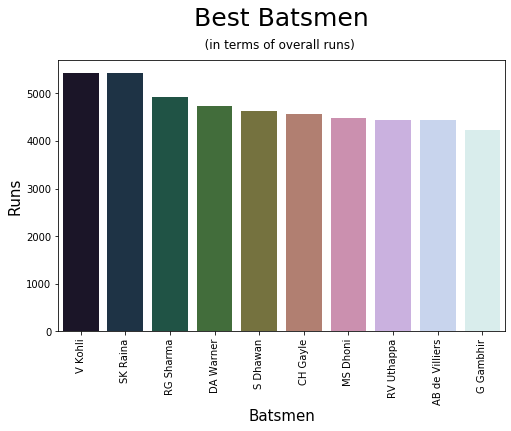

In [24]:
best_batsman = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='cubehelix')
plt.title('Best Batsmen\n', fontsize=25)
plt.suptitle('\n   (in terms of overall runs)')
plt.xlabel('Batsmen', fontsize=15)
plt.ylabel('Runs', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Virat Kohli is the highest run getter followed by Suresh Raina without much difference.

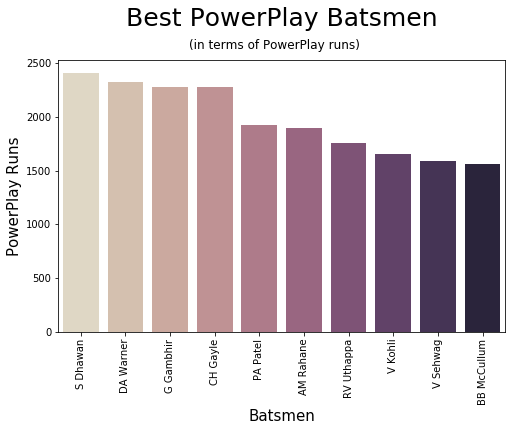

In [25]:
best_batsman_pp = data_d.loc[data_d['over'].isin(powerplay)]
best_batsman_pp = best_batsman_pp.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_pp = best_batsman_pp.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_pp.index, y=best_batsman_pp['batsman_runs'], palette='ch:s=-.2,r=.6')
plt.title('Best PowerPlay Batsmen\n', fontsize=25)
plt.suptitle('\n(in terms of PowerPlay runs)')
plt.xlabel('Batsmen', fontsize=15)
plt.ylabel('PowerPlay Runs', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - Shikhar Dhawan has scored most runs in the Power Play overs in the IPL.

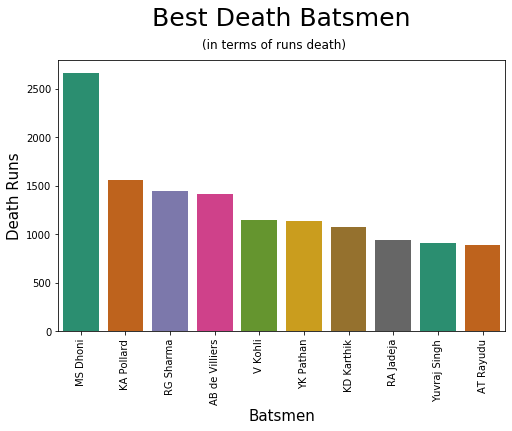

In [26]:
best_batsman_death = data_d.loc[data_d['over'].isin(death)]
best_batsman_death = best_batsman_death.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_death = best_batsman_death.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_death.index, y=best_batsman_death['batsman_runs'], palette='Dark2')
plt.title('Best Death Batsmen\n', fontsize=25)
plt.suptitle('\n(in terms of runs death)')
plt.xlabel('Batsmen', fontsize=15)
plt.ylabel('Death Runs', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 - MS Dhoni, the finisher, tops the list of batsmen with most runs in death overs by a considerable margin.

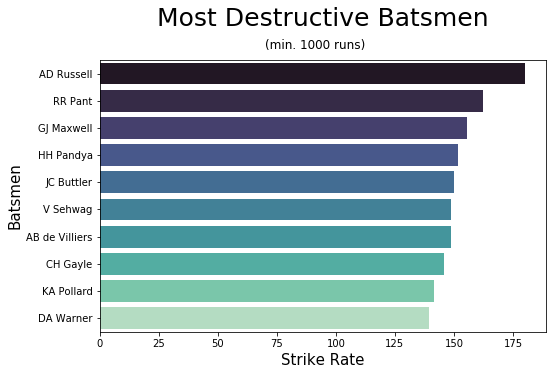

In [27]:
strike_rate = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls'] = data_d.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate'] = strike_rate['batsman_runs']/strike_rate['balls'] * 100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 1000].sort_values(by=['rate'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=strike_rate['rate'], y=strike_rate['batsman'], palette='mako')
plt.title('Most Destructive Batsmen\n', fontsize=25)
plt.suptitle('\n(min. 1000 runs)')
plt.xlabel('Strike Rate', fontsize=15)
plt.ylabel('Batsmen', fontsize=15)
plt.show()

Andre Russell is the most destructive batsman with highest strike rate in IPL.

## TOSS Analysis
 - Let's see what role does toss play in different scenarios.

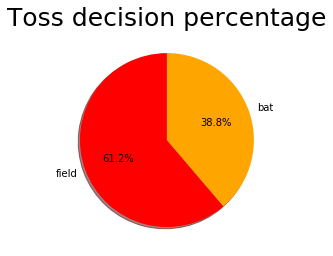

In [28]:
toss = data_m.toss_decision.value_counts()
labels = np.array(toss.index)
sizes = (np.array(toss / toss.sum())*100)
colors = ['red', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Toss decision percentage', fontsize=25)
plt.show()

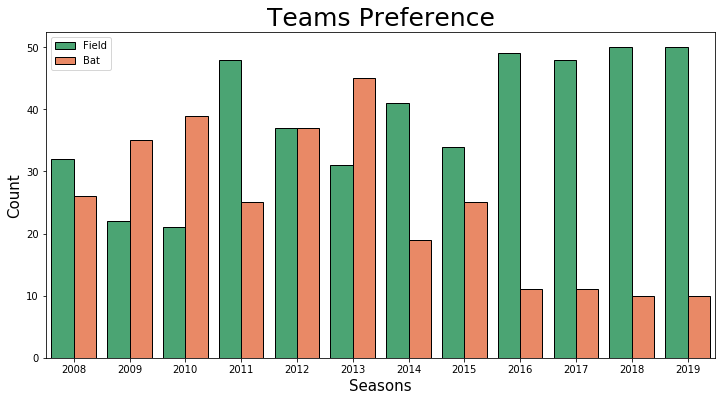

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x=data_m['season'], hue=data_m['toss_decision'], palette=dict(field='mediumseagreen', bat='coral'), edgecolor='black')
plt.title('Teams Preference', fontsize=25)
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(('Field', 'Bat'))
plt.show()

 - It can be clearly seen that teams winning the toss prefer to chase.

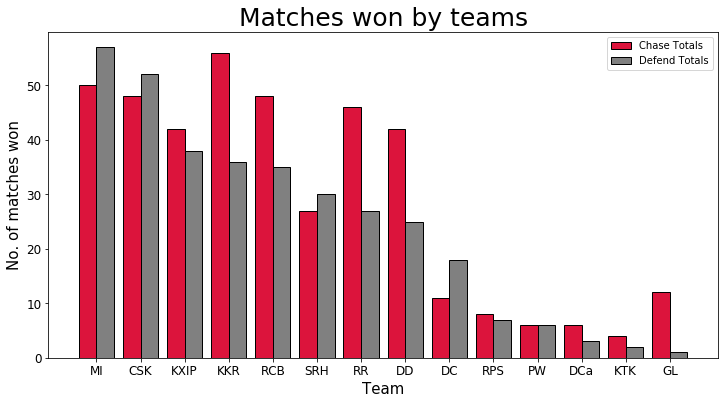

In [30]:
innings1 = data_m.loc[data_m['win_by_runs'] != 0]
innings1 = innings1['winner'].value_counts().reset_index().set_index('index')
innings1.columns = ['Defend Totals']

innings2 = data_m.loc[data_m['win_by_wickets'] != 0]
innings2 = innings2['winner'].value_counts().reset_index().set_index('index')
innings2.columns = ['Bat2']
innings1['Chase Totals'] = innings2['Bat2']

x = np.arange(14)
fig, ax = plt.subplots(figsize=(12,6))
c1 = plt.bar(x-0.2, innings1['Chase Totals'], width=0.4, color='crimson', edgecolor='black')
c2 = plt.bar(x+0.2, innings1['Defend Totals'], width=0.4, color='grey', edgecolor='black')
plt.xticks(size=12)
ax.set_xticks(x)
ax.set_xticklabels(innings1.index)
plt.yticks(size=12)
plt.title('Matches won by teams', fontsize=25)
plt.xlabel('Team', fontsize=15)
plt.ylabel('No. of matches won', fontsize=15)
plt.legend((c1[0], c2[0]), ('Chase Totals', 'Defend Totals'))
plt.show()

## Stadium wise analysis for most played 6 venues
 - Lets see what the teams should choose after winning the toss on these grounds.

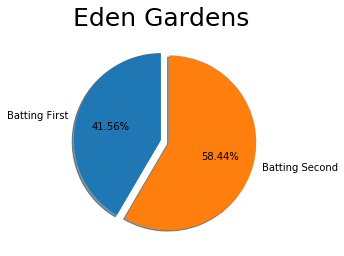

In [31]:
# Eden Gardens
Kolkata_stadium = data_m.loc[(data_m['venue'] == 'Eden Gardens')]
Kolkata_stadium_win_by_runs = Kolkata_stadium[Kolkata_stadium['win_by_runs'] > 0]
slices = [len(Kolkata_stadium_win_by_runs), len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels = ['Batting First', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.2f%%')
plt.title('Eden Gardens', fontsize=25)
plt.show()

 - Batting second at Eden Gardens is clearly favourable.

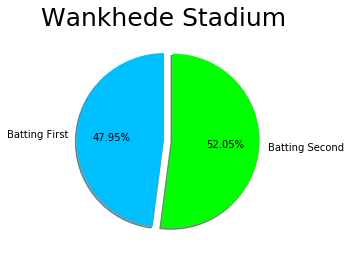

In [32]:
# Wankhede Stadium
Mumbai_stadium = data_m.loc[(data_m['venue'] == 'Wankhede Stadium')]
Mumbai_stadium_win_by_runs = Mumbai_stadium[Mumbai_stadium['win_by_runs'] > 0]
slices = [len(Mumbai_stadium_win_by_runs), len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels = ['Batting First', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.2f%%', colors=['#00bfff','#00ff00'])
plt.title('Wankhede Stadium', fontsize=25)
plt.show()

 - Batting second is slightly favourable at Wankhede.

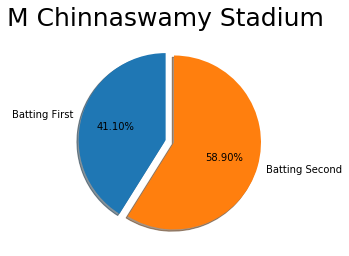

In [33]:
# M Chinnaswamy Stadium
Bengaluru_stadium = data_m.loc[(data_m['venue'] == 'M Chinnaswamy Stadium')]
Bengaluru_stadium_win_by_runs = Bengaluru_stadium[Bengaluru_stadium['win_by_runs'] > 0]
slices = [len(Bengaluru_stadium_win_by_runs), len(Bengaluru_stadium)-len(Bengaluru_stadium_win_by_runs)]
labels = ['Batting First', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.2f%%')
plt.title('M Chinnaswamy Stadium', fontsize=25)
plt.show()

 - Batting second at Chinnaswamy Stadium clearly has better win percentage.

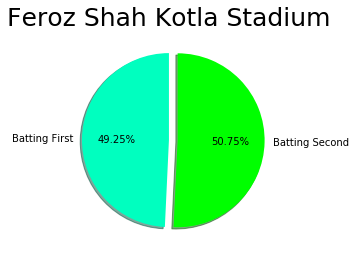

In [34]:
# Feroz Shah Kotla
Delhi_stadium = data_m.loc[(data_m['venue'] == 'Feroz Shah Kotla')]
Delhi_stadium_win_by_runs = Delhi_stadium[Delhi_stadium['win_by_runs'] > 0]
slices = [len(Delhi_stadium_win_by_runs), len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels = ['Batting First', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.2f%%', colors=['#00ffbf','#00ff00'])
plt.title('Feroz Shah Kotla Stadium', fontsize=25)
plt.show()

 - This shows it doesn't matter much if a team bats first or bowls first at Feroz Shah Kotla.

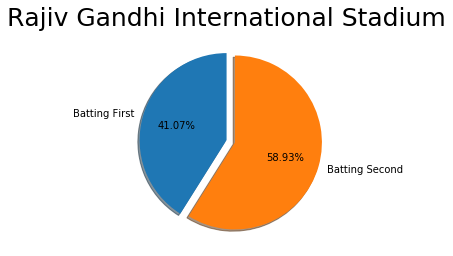

In [35]:
# Rajiv Gandhi International Stadium
Hyderabad_stadium = data_m.loc[(data_m['venue'] == 'Rajiv Gandhi International Stadium, Uppal')]
Hyderabad_stadium_win_by_runs = Hyderabad_stadium[Hyderabad_stadium['win_by_runs'] > 0]
slices = [len(Hyderabad_stadium_win_by_runs), len(Hyderabad_stadium)-len(Hyderabad_stadium_win_by_runs)]
labels = ['Batting First', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.2f%%')
plt.title('Rajiv Gandhi International Stadium', fontsize=25)
plt.show()

 - Batting second is again clearly favourable at Rajiv Gandhi International Stadium.

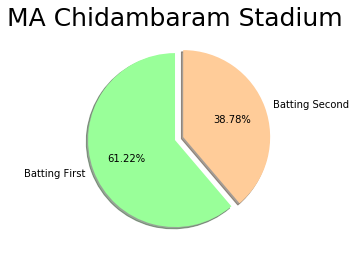

In [36]:
# MA Chidambaram Stadium
Chennai_stadium = data_m.loc[(data_m['venue'] == 'MA Chidambaram Stadium, Chepauk')]
Chennai_stadium_win_by_runs = Chennai_stadium[Chennai_stadium['win_by_runs'] > 0]
slices = [len(Chennai_stadium_win_by_runs), len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels = ['Batting First', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.2f%%', colors=['#99ff99','#ffcc99'])
plt.title('MA Chidambaram Stadium', fontsize=25)
plt.show()

 - Unlike other grounds, batting first at MA Chidambaram Stadium is clearly a great option.

## Sixes and Fours across seasons

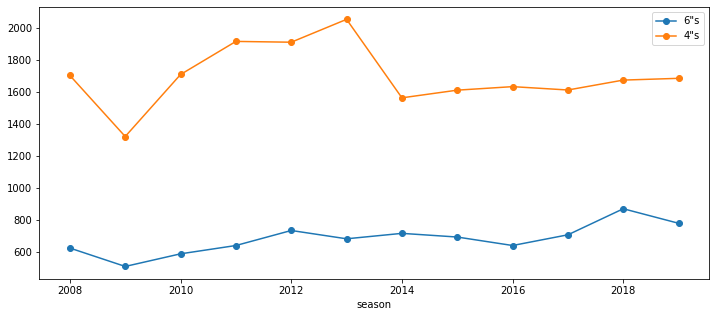

In [37]:
batsmen = data_m[['season']].merge(data_d, how='left', left_on=data_m.index, right_on=data_d.index)
season_sixes = batsmen.groupby('season')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
season_fours = batsmen.groupby('season')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
season_boundaries = season_sixes.merge(season_fours, how='left', left_on='season', right_on='season')
season_boundaries = season_boundaries.rename(columns={'batsman_runs_x':'6"s', 'batsman_runs_y':'4"s'})
season_boundaries.set_index('season')[['6"s', '4"s']].plot(marker='o')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.show()

## 200+ scores

In [38]:
high_scores = data_d.groupby(['inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
#reset_index() converts the obtained series into a dataframe
high_scores = high_scores[high_scores['total_runs'] >= 200]
high_scores.nlargest(10, 'total_runs')

,inning,batting_team,bowling_team,total_runs
73,1,MI,DD,2722
63,1,KXIP,KKR,2672
70,1,MI,CSK,2610
64,1,KXIP,MI,2603
175,2,KKR,KXIP,2564
49,1,KKR,RCB,2539
113,1,RR,KKR,2538
180,2,KKR,RR,2418
97,1,RCB,KXIP,2406
204,2,MI,KXIP,2399


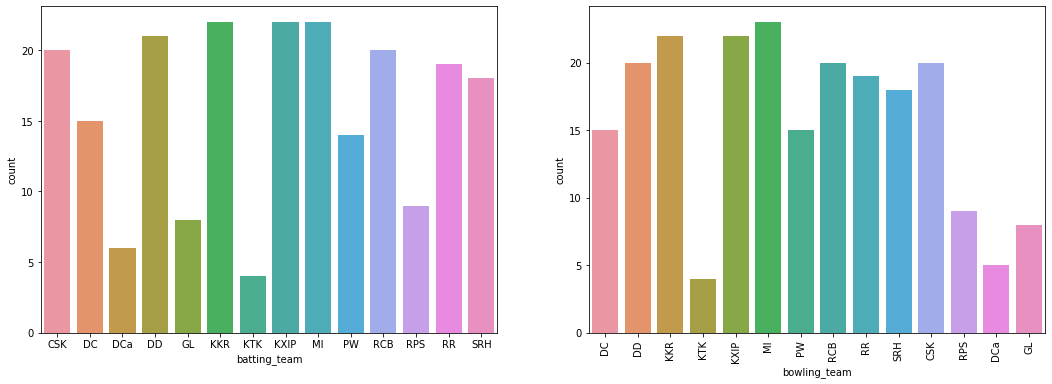

In [39]:
fig, ax = plt.subplots(1,2)
sns.countplot(high_scores['batting_team'], ax=ax[0])
sns.countplot(high_scores['bowling_team'], ax=ax[1])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

 - The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs.

## Performance of teams across different grounds

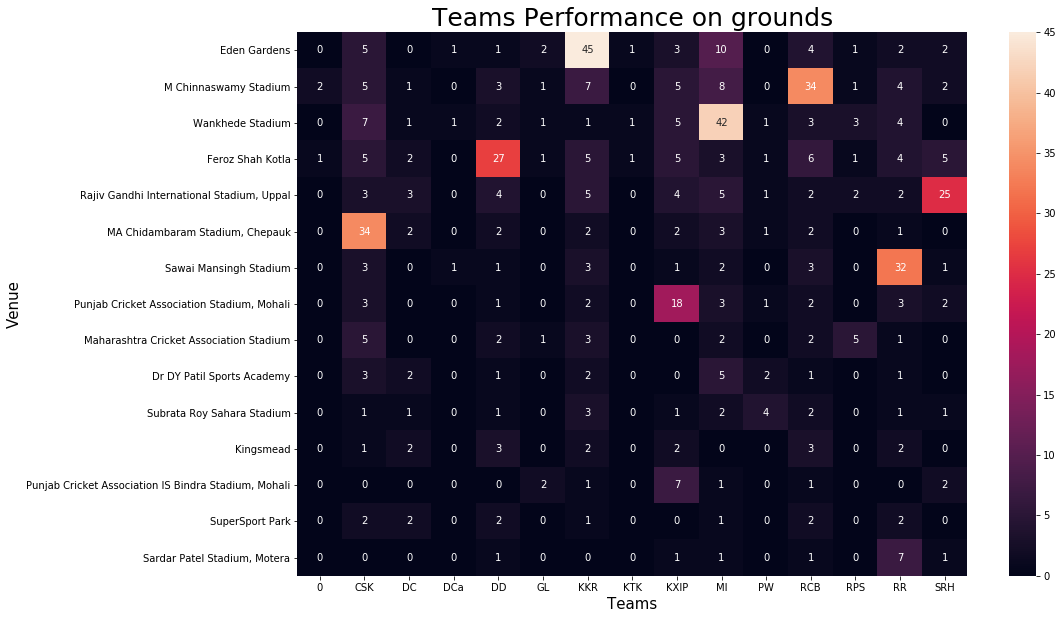

In [40]:
venue = data_m.groupby(['venue', 'winner']).count()
venue = venue.iloc[:-1, :1].reset_index()
venue = venue.rename(columns={'season':'wins'})
venue = venue.pivot('venue', 'winner', 'wins')
venue.fillna(0, inplace=True)
venue['total'] = venue.sum(axis=1, skipna=False)
venue = venue.sort_values(by=['total'], ascending=False).head(15)
venue.drop(['total'], axis=1, inplace=True)

plt.figure(figsize=(15,10))
sns.heatmap(data=venue, annot=True, cmap='rocket')
plt.title('Teams Performance on grounds', fontsize=25)
plt.xlabel('Teams', size=15)
plt.ylabel('Venue', size=15)
plt.show()

 - **Most of the Teams such as MI, KKR and CSK are very strong at their home ground, whereas there is no Team who is dominant at away grounds. So, Home advantage is very crucial for Most of the Teams.**

## Conclusions and views as a Sports Analyst :
 - Mumbai Indians is the best team of IPL with most number of titles and wins.
 - Chennai Super Kings has also performed well with 3 titles.
 - After winning the toss, teams are more comfortable chasing totals rather than defending.
 - While it may be a good decision to field first at most of the grounds, batting first might prove to be better in Chennai as teams defending totals have won more than 61% of their matches in Chennai.
 - Chris Gayle and and AB Devilliers can be termed as Most Valuable Players of IPL as they have won maximum Man of the Match awards.
 - 'Yorker King' Lasith Malinga is the all time leading wicket taker in IPL and also the best death death bowler.
 - Indian spinners have dominated the bowling cycle as 3 of the top 5 leaading wicket takers are Indian spinners.
 - Virat Kohli, Suresh Raina and Rohit Sharma are run-machines and consistent performers.
 - It seems that left handed openers are crucial for any team as the top 5 best Power Play batsmen are left handers.
 - MS Dhoni has maintained the tag of 'Finisher' by being the best batsman in death overs.
 - Andre Russell is the most destructive batsman because of his hard hitting power and highest strike rate.
 - 'Home Advantage' is a real thing in IPL as almost all the teams win majority of the matches at their home grounds.

## Best team and players for endorsement :
 - Mumbai Indians and Chennai Super Kings are the teams to go with as these are the most successful teams.
 - Royal Challengers Bangalore and Kolkata Knight Riders can also be considered due to their huge fan base and star players like Virat Kohli, AB De Villiers and Andre Russell.
 - Star players like MS Dhoni, Virat Kohli, Rohit Sharma, Suresh Raina, AB De Villiers, Kieron Pollard, Chris Gayle, David Warner, DJ Bravo can be endorsed by companies because of their match-winning ability. 
 - Young talented players like Rishabh Pant can also be considered.

## Thank You!